In [1]:
suppressPackageStartupMessages({
    source('../libs.R')
    source('../utils.R')    
    source('../Figures/colors.R')
    # source('../utils_mapping.R')
    source('../utils_plotting.R')
})


In [2]:
dname <- '../../data/cache/obj_fibroblasts/'
fields_load <- c('meta_data', 'umap_after', 'umap_before', 'V', 'V_unweighted', 'effects_nested', 'effects_marginal')
obj <- map(fields_load, function(name) {
    readRDS(file.path(dname, paste0(name, '.rds')))
})
names(obj) <- fields_load


In [3]:
obj$meta_data <- obj$meta_data %>% 
    dplyr::mutate(tissue_cluster = case_when(
        tissue_cluster == 'NOTCH3+ perivascular' ~ 'Sublining',
        TRUE ~ tissue_cluster
    ))

# %>% 
#     with(table(tissue_cluster))


In [4]:
obj$meta_data %>% 
    dplyr::select(LibraryID, Tissue, Case) %>% 
    unique() %>% 
    subset(Tissue == 'SalivaryGland') %>% 
    arrange(LibraryID)

#     with(table(Case))

LibraryID,Tissue,Case
<chr>,<chr>,<chr>
GX09,SalivaryGland,SICCA
GX21,SalivaryGland,SICCA
GX33,SalivaryGland,SICCA
GX44,SalivaryGland,SICCA
GX45,SalivaryGland,SICCA
GX46,SalivaryGland,SICCA
GX47,SalivaryGland,PSS
GX48,SalivaryGland,PSS
GX50,SalivaryGland,PSS


In [5]:
obj$meta_data %>% 
    subset(Tissue == 'Synovium') %>% 
    dplyr::select(LibraryID, Case) %>% 
    unique() %>% 
    with(table(Case))


Case
     Osteoarthritis RheumatoidArthritis 
                  6                  15 

In [6]:
str <- 'GX43 Sample:01_A_GEXv3
GX44 Sample:02_D_GEXv3
GX46 Sample:04_L_GEXv3
GX47 Sample:05_B_GEXv3
GX48 Sample:06_D_GEXv3
GX49 Sample:07_M_GEXv3
GX50 Sample:08_H_GEXv3
GX09 Sample:01_I_GEXv3
GX21 Sample:02_J_GEXv3
GX33 Sample:03_N_GEXv3
GX45 Sample:04_P_GEXv3
GX57 Sample:05_E_GEXv3
GX69 Sample:06_F_GEXv3
GX81 Sample:07_O_GEXv3
GX93 Sample:08_G_GEXv3'

str <- str_split(str, '\n')[[1]]


In [7]:
tibble(
    LibraryID = gsub('(GX\\d+).*', '\\1', str),
    name = gsub('.*(.)_GEXv3', '\\1', str)
) %>% 
    inner_join(
        obj$meta_data %>% 
            dplyr::select(LibraryID, Tissue, Case) %>% 
            unique() %>% 
            subset(Tissue == 'SalivaryGland') %>% 
            arrange(LibraryID)
    ) %>% 
    arrange(Case, name)


Joining, by = "LibraryID"


LibraryID,name,Tissue,Case
<chr>,<chr>,<chr>,<chr>
GX47,B,SalivaryGland,PSS
GX48,D,SalivaryGland,PSS
GX57,E,SalivaryGland,PSS
GX69,F,SalivaryGland,PSS
GX93,G,SalivaryGland,PSS
GX50,H,SalivaryGland,PSS
GX81,O,SalivaryGland,PSS
GX44,D,SalivaryGland,SICCA
GX09,I,SalivaryGland,SICCA


# UMAP (tissues) 

In [8]:
N <- as.integer(sum(obj$meta_data$Tissue == 'Lung'))
idx <- obj$meta_data %>% 
    tibble::rowid_to_column('idx') %>% 
    group_by(Tissue) %>% 
    sample_n(N) %>% 
    ungroup() %>% 
    with(idx)
    

In [9]:
# fig.size(4, 7)
# p1 <- do_scatter(
# #     obj$umap_after[idx, ], obj$meta_data[idx, ], 'Tissue', 
#     obj$umap_after, obj$meta_data, 'Tissue', 
#     quo(Tissue), nrow = 2, 
#     base_size = 14, pt_size = 6,
#     palette_use = palette_global, 
# #     pt_shape = 16, point_size = .5, 
#     do_raster = TRUE, h = 1.5, w = 2,
#     do_labels = FALSE, no_guides = TRUE
# ) + 
# #     facet_wrap(~Tissue, nrow = 2) + 
#     NULL
# p1


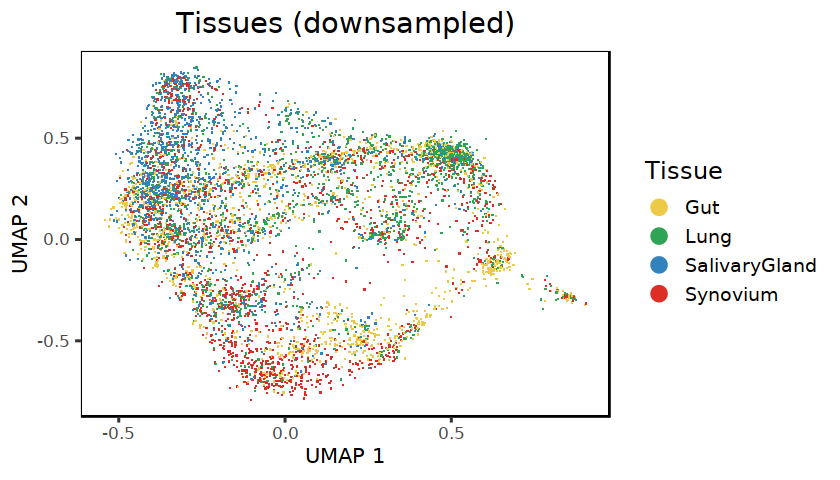

In [10]:
fig.size(4, 7)
p1 <- do_scatter(
    obj$umap_after[idx, ], obj$meta_data[idx, ], 'Tissue', 
    base_size = 14, pt_size = 6,
    palette_use = palette_global[unique(obj$meta_data[idx, 'Tissue'])], 
#     pt_shape = 16, point_size = .5, 
#     do_raster = TRUE, h = 1.5, w = 2,
    do_labels = FALSE, no_guides = FALSE
#     do_labels = FALSE, no_guides = TRUE
) + 
    labs(title = 'Tissues (downsampled)') + 
    theme(
        plot.title = element_text()
    ) + 
    NULL
p1


# UMAP (old types) 

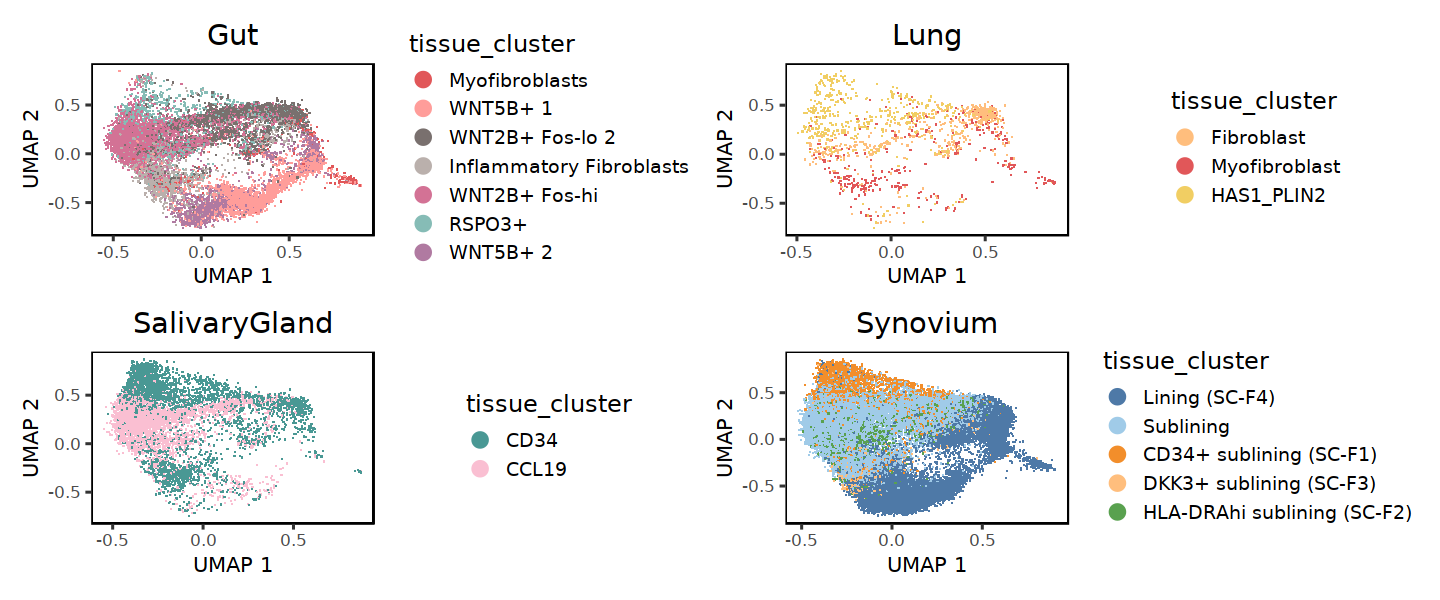

In [11]:
fig.size(5, 12)
p2 <- split(seq(nrow(obj$meta_data)), obj$meta_data$Tissue) %>% 
    imap(function(idx, tissue) {
        do_scatter(
            obj$umap_after[idx, ], obj$meta_data[idx, ], 
#             obj$.umap_after[[2]][idx, ], obj$meta_data[idx, ], 
            'tissue_cluster', 
            palette_use = palette_global[unique(obj$meta_data[idx, 'tissue_cluster'])], 
            base_size = 10, 
            pt_size = 5, do_labels = FALSE, no_guides = FALSE
        ) + 
        labs(title = tissue)
    }) %>% 
    reduce(`+`)

p2 


In [12]:
# fig.size(4, 7)
# p2 <- do_scatter(
#     obj$umap_after, obj$meta_data, 'tissue_cluster', 
# #     quo(Tissue), nrow = 2, 
#     base_size = 14, pt_size = 6,
# #     pt_shape = 16, point_size = .5, 
#     do_raster = TRUE, h = 3, w = 4,
#     do_labels = FALSE, no_guides = FALSE
# ) + 
#     facet_wrap(~Tissue, nrow = 2) + 
#     NULL
# p2


# UMAP (clusters) 

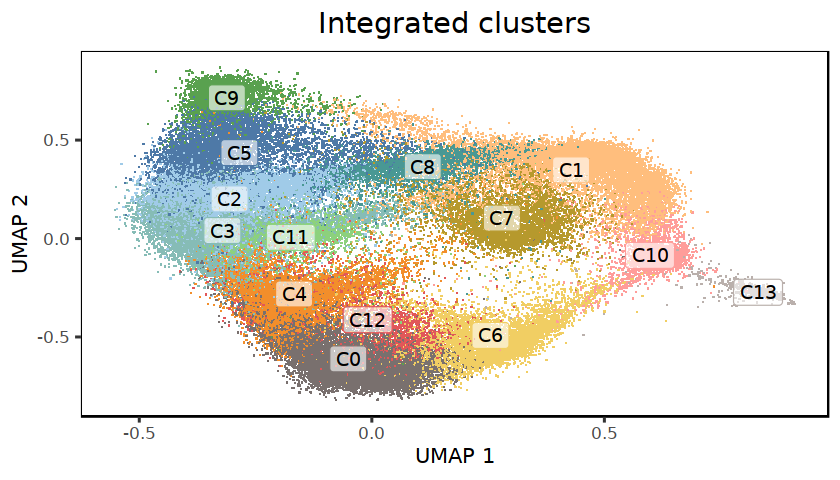

In [13]:
fig.size(4, 7)
p3 <- do_scatter(
    obj$umap_after, obj$meta_data %>% dplyr::mutate(Cluster = paste0('C', Cluster)), 'Cluster', 
#     obj$umap_after, obj$meta_data, 'Cluster_name', 
#     quo(Tissue), nrow = 2, 
    base_size = 14, pt_size = 4,
    palette_use = palette_global[paste0('C', unique(obj$meta_data$Cluster))], 
#     do_raster = TRUE, h = 3, w = 4
#     do_labels = FALSE, no_guides = FALSE
) + 
    labs(title = 'Integrated clusters') + 
#     theme(
#         legend.text = element_text(size = 5),
#         legend.title = element_blank(),
#         legend.position = 'right',
#         legend.spacing.y = unit(.00001, 'cm')
#     ) + 
    NULL

p3


# Cell numbers

Warning message:
“Transformation introduced infinite values in continuous y-axis”


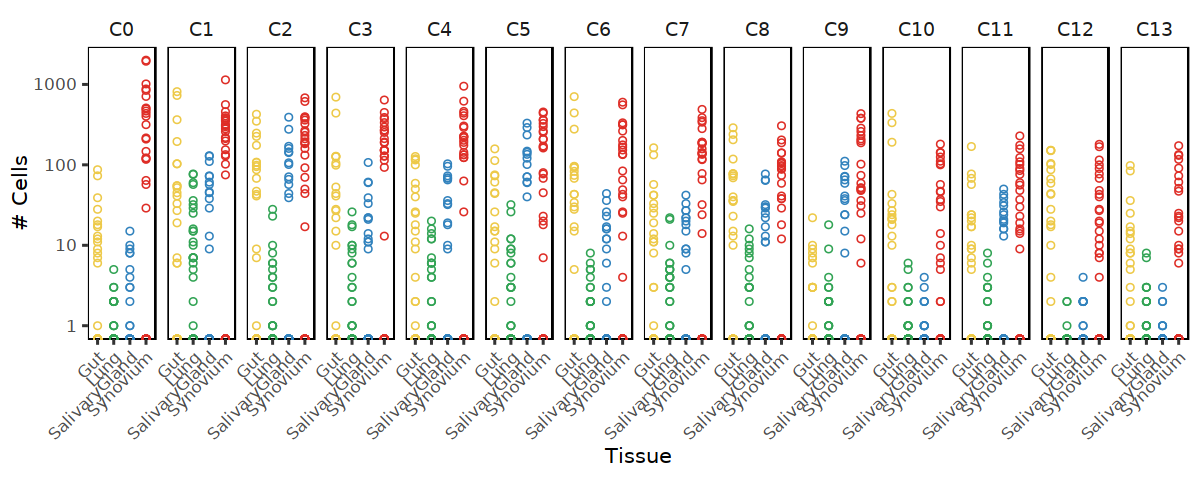

In [14]:
p3_2 <- with(obj$meta_data, table(LibraryID, Cluster, Tissue)) %>% 
    data.table() %>% 
    dplyr::mutate(Cluster = factor(paste0('C', Cluster), paste0('C', 0:20))) %>% 
    ggplot(aes(Tissue, N, color = Tissue)) + 
        geom_point(shape = 21) + 
        # coord_flip() + 
        # facet_grid(Cluster_name~., scales = 'free', space = 'free') + 
        facet_grid(~Cluster, scales = 'free_y') + 
        scale_color_manual(values = palette_global[unique(obj$meta_data$Tissue)]) + 
        scale_y_log10() + 
        theme(
            # panel.border = element_rect(fill = NA, color = 'white'), 
            # axis.title.y = element_blank(), 
            # axis.ticks.y = element_blank(),
            # axis.text.y = element_blank()
            # axis.title.x = element_blank(), 
            # axis.ticks.x = element_blank(),
            # axis.text.x = element_blank()
            axis.text.x = element_text(angle = 45, hjust=1)
        ) + 
        guides(color = 'none') + 
        labs(y = '# Cells') + 
        NULL

fig.size(4, 10)
p3_2


# Forest plots

In [15]:
# gene_plot <- 'MYH11'
gene_plot <- 'MYL9'
cluster_plot <- '13'

# gene_plot <- 'ADAM12'
# cluster_plot <- '4'
ylim_plot <- c(-3, 3)

In [16]:
foo <- function(gene_plot, cluster_plot, ylim_plot) {
    plt_df <- rbind(
        obj$effects_nested %>% 
            subset(feature == gene_plot) %>% 
            subset(Cluster == cluster_plot) %>% 
            dplyr::select(Cluster, Tissue, beta, sigma, zscore, pvalue),
        obj$effects_marginal %>% 
            subset(feature == gene_plot) %>% 
            subset(Cluster == cluster_plot) %>% 
            dplyr::mutate(Tissue = 'Mean') %>% 
            dplyr::select(Cluster, Tissue, beta, sigma, zscore, pvalue)

    ) 
    
    plt_df %>% 
        ggplot(aes(Tissue, beta, color = Tissue)) + 
            geom_point() + 
            geom_errorbar(aes(ymin = beta - 1.96 * sigma, ymax = beta + 1.96 * sigma), width = 0) + 
            coord_flip() + 
    #         facet_grid(feature ~ ., space = "free", scales = "free") + 
            facet_grid(Tissue != 'Mean' ~ ., scales = 'free', space = 'free') + 
            geom_hline(yintercept = c(0), linetype = 2) + 
            labs(x = "", y = "Log2 fold change") +
            guides(color = FALSE) + 
            theme(
                strip.text = element_blank() 
            ) + 
            scale_y_continuous(limits = ylim_plot) + 
            NULL
    
}


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


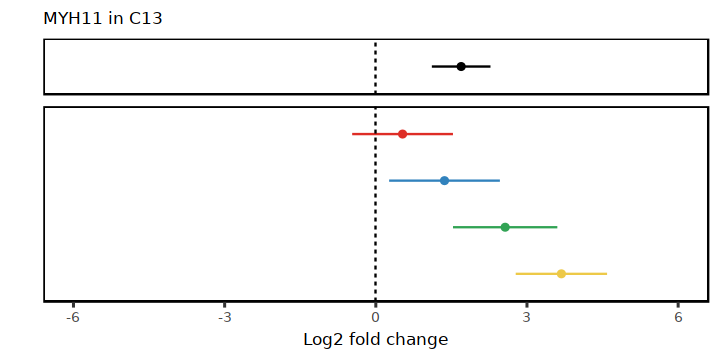

In [17]:
fig.size(3, 6)
forest_myh11 <- foo('MYH11', '13', c(-6, 6)) + 
    labs(title = 'MYH11 in C13') + 
#     labs(title = 'MYH11 in Cluster C13') + 
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.x = element_text(size = 8),
        plot.title = element_text(size = 10),
        axis.title.x = element_text(size = 10)
    )
#     labs(title = 'Tissue-specific marker', subtitle = 'MYH11 in Cluster C13')

forest_myh11


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


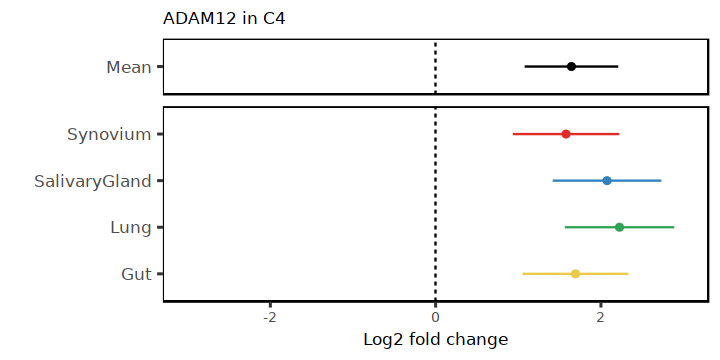

In [18]:
fig.size(3, 6)
forest_adam12 <- foo('ADAM12', '4', c(-3, 3)) + 
    labs(title = 'ADAM12 in C4') + 
    theme(
        axis.text.x = element_text(size = 8),
        plot.title = element_text(size = 10),
        axis.title.x = element_text(size = 10)
    ) 

forest_adam12


# Number conserved markers 

In [19]:
effects_joint <- inner_join(
    dplyr::select(obj$effects_marginal, Cluster, feature, beta, sigma, pvalue),
    dplyr::select(obj$effects_nested, Cluster, Tissue, feature, beta, sigma, pvalue), 
    by = c('Cluster', 'feature'), 
    suffix = c('_marginal', '_nested')
) %>% 
    dplyr::mutate(zscore = (beta_marginal - beta_nested) / sqrt(sigma_marginal^2 + sigma_nested^2)) %>% 
    dplyr::mutate(pvalue = 2 * pnorm(-abs(zscore))) %>% 
    identity()


In [20]:
markers_conserved_df <- inner_join(
    ## filter out genes with heterogeneous effects (from mean effect)
    data.table(effects_joint)[
        , all(pvalue > .05 & pvalue_marginal < .05), by = .(feature, Cluster)
    ][V1 == TRUE][, V1 := NULL][],

    ## conserved genes must individually be significantly > 0
    data.table(obj$effects_nested)[
        , all(pvalue < .05 & beta > 0), by = .(feature, Cluster)
    ][V1 == TRUE][, V1 := NULL][]
) %>% 
    left_join(
        tibble(
            Cluster = as.character(0:13),
            is_conserved = case_when(
                Cluster %in% c('5', '8', '9', '11', '4') ~ TRUE,
                TRUE ~ FALSE
            )
        )
    )

Joining, by = c("feature", "Cluster")
Joining, by = "Cluster"


In [21]:
plt_df <- markers_conserved_df[, .N, by = .(Cluster, is_conserved)][order(-N)] %>% 
    left_join(
        data.table(effects_joint)[
                , all(pvalue > .05 & pvalue_marginal < .05), by = .(feature, Cluster)
            ][V1 == TRUE][, V1 := NULL][, .(ntotal = .N), by = Cluster]    
    ) %>% 
    dplyr::mutate(
        Cluster = paste0('C', Cluster),
        percent_conserved = 100 * (N / ntotal)
    )


Joining, by = "Cluster"


In [22]:
plt_df %>% arrange(-percent_conserved)

Cluster,is_conserved,N,ntotal,percent_conserved
<chr>,<lgl>,<int>,<int>,<dbl>
C11,TRUE,89,257,34.630350
C2,FALSE,9,30,30.000000
C0,FALSE,5,17,29.411765
C9,TRUE,77,355,21.690141
C4,TRUE,49,252,19.444444
C8,TRUE,93,617,15.072934
C5,TRUE,31,211,14.691943
C3,FALSE,9,70,12.857143
C6,FALSE,13,116,11.206897


In [23]:
# fig.size(3, 4)
# # p5 <- ggplot(plt_df, aes(reorder(Cluster, N), N, fill = is_conserved)) + 
# p5 <- ggplot(plt_df, aes(reorder(Cluster, percent_conserved), percent_conserved, fill = is_conserved)) + 
#     geom_bar(stat = 'identity') + 
#     coord_flip() + 
#     scale_color_manual(values = c('black', 'red')) + 
#     scale_fill_manual(values = c('black', 'red')) + 
#     guides(color = FALSE, fill = FALSE) + 
#     geom_hline(yintercept = 20, linetype = 2) + 
#     theme(
#         axis.title.y = element_blank(),
#         axis.text = element_text(size = 8),
#         axis.title.x = element_text(size = 10)
#     ) + 
#     labs(y = '# shared markers') + 
#     NULL

# p5


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


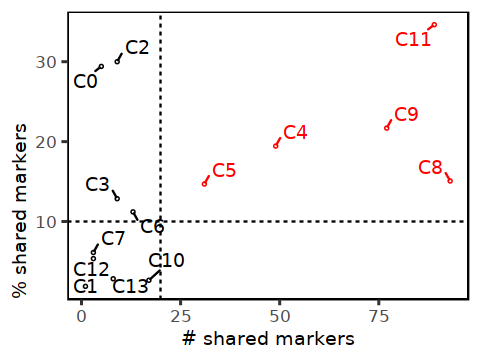

In [24]:
fig.size(3, 4)
p5 <- ggplot(plt_df, aes(N, percent_conserved, color = is_conserved)) + 
    geom_point(shape = 21, size = .5) + 
    geom_text_repel(
        aes(label = Cluster),
#         data = . %>% subset(is_conserved),
        seed = 42, 
        min.segment.length = 0
    ) + 
    scale_color_manual(values = c('black', 'red')) + 
    scale_fill_manual(values = c('black', 'red')) + 
    guides(color = FALSE, fill = FALSE) + 
    geom_vline(xintercept = 20, linetype = 2) + 
    geom_hline(yintercept = 10, linetype = 2) + 
    theme(
        axis.title.y = element_text(hjust=0, size = 11),
        axis.title.x = element_text(size = 11)
    ) + 
    labs(x = '# shared markers', y = '% shared markers') + 
    NULL

p5


# Heatmap 

In [25]:
clusters_plot <- c('4', '5', '8', '9', '11')
markers_all <- rbind(
    data.table(obj$effects_marginal)[pvalue < .05 & beta > 0, head(.SD[order(-zscore)], 1), by = feature],
    obj$effects_marginal %>% subset(
        (Cluster == '11' & feature %in% c('CXCL9', 'CCL21')) |
        (Cluster == '9' & feature %in% c('CD34')) |
        (Cluster == '4' & feature %in% c('COL3A1', 'MMP13', 'SPARC')) |
        (Cluster == '5' & feature %in% c('FBLN1')) |
        FALSE
    )    
) %>% 
    unique() %>% 
    subset(Cluster %in% clusters_plot) %>% 
    dplyr::mutate(Cluster = factor(Cluster, c('4', '5', '8', '9', '11'))) %>% 
    split(.$Cluster) %>% 
    map(sample_frac, 1L) %>% 
    bind_rows()
#     arrange(Cluster)

markers_top <- data.table(markers_all)[pvalue < .05 & beta > 0, head(.SD[order(-zscore)], 5), by = Cluster] %>% 
    arrange(Cluster)

markers_top <- rbind(
    markers_top, 
    markers_all %>% subset(
        (Cluster == '11' & feature %in% c('CXCL9', 'CCL21')) |
        (Cluster == '9' & feature %in% c('CD34')) |
        (Cluster == '4' & feature %in% c('COL3A1', 'MMP13', 'SPARC')) |
        (Cluster == '5' & feature %in% c('FBLN1')) |
        FALSE
    )  
) %>% 
    unique()


In [26]:
length(unique(markers_all$feature))

[1] 1524

In [27]:
plt_mat <- obj$effects_nested %>% 
    subset(Cluster %in% markers_all$Cluster) %>% 
    subset(feature %in% markers_all$feature) %>% 
    dplyr::select(feature, Cluster, Tissue, zscore) %>% 
    tidyr::unite(Tissue_Cluster, Tissue, Cluster) %>% 
    tidyr::spread(Tissue_Cluster, zscore) %>% 
    tibble::column_to_rownames('feature') %>% 
    t()

rownames(plt_mat) <- gsub('(.*)_(.*)', '\\1 C\\2', rownames(plt_mat))

dim(plt_mat)


[1]   20 1524

In [28]:
# fig.size(6, 10)
# ht_opt(RESET = TRUE)
# ht_opt("heatmap_column_names_gp" = gpar(fontsize = 8))

# mat <- plt_mat[, markers_all$feature]
# ccl <- colnames(mat) %in% markers_top$feature


# h1 <- Heatmap(
#     matrix = mat, 
#     show_column_names = FALSE,
#     colorRamp2(c(-3, 0, 3), c(muted('red'), 'white', muted('blue'))),    
#     row_order = order(as.integer(gsub('.*?_(\\d+)', '\\1', rownames(plt_mat)))), 
#     column_names_rot = 90, 
#     cluster_columns = FALSE, 
#     cluster_rows = FALSE, 
#     top_annotation = columnAnnotation(
#         show_legend = FALSE, 
#         link = anno_mark(
#             at = which(ccl), 
#             labels = colnames(mat)[ccl], 
#             labels_gp = gpar(fontsize = 10), padding = unit(1, "mm"),
#             labels_rot = 45
#         ),
#         Cluster = markers_all$Cluster
# #         col = colors
#     ),
#     right_annotation = rowAnnotation(
#         df = data.frame(
#             Cluster = gsub('^(.*)_(\\d+)', '\\2', rownames(mat)),
#             Tissue = gsub('^(.*)_(\\d+)', '\\1', rownames(mat))
#         )
#     ),
# )

# h1

# p6 <- grid.grabExpr(draw(h1))



In [29]:
clust_dict <- obj$meta_data %>% 
    dplyr::select(Cluster, Cluster_name) %>% 
    unique() %>% 
    tibble::remove_rownames() %>% 
    tibble::column_to_rownames('Cluster')


Loading required namespace: jpeg



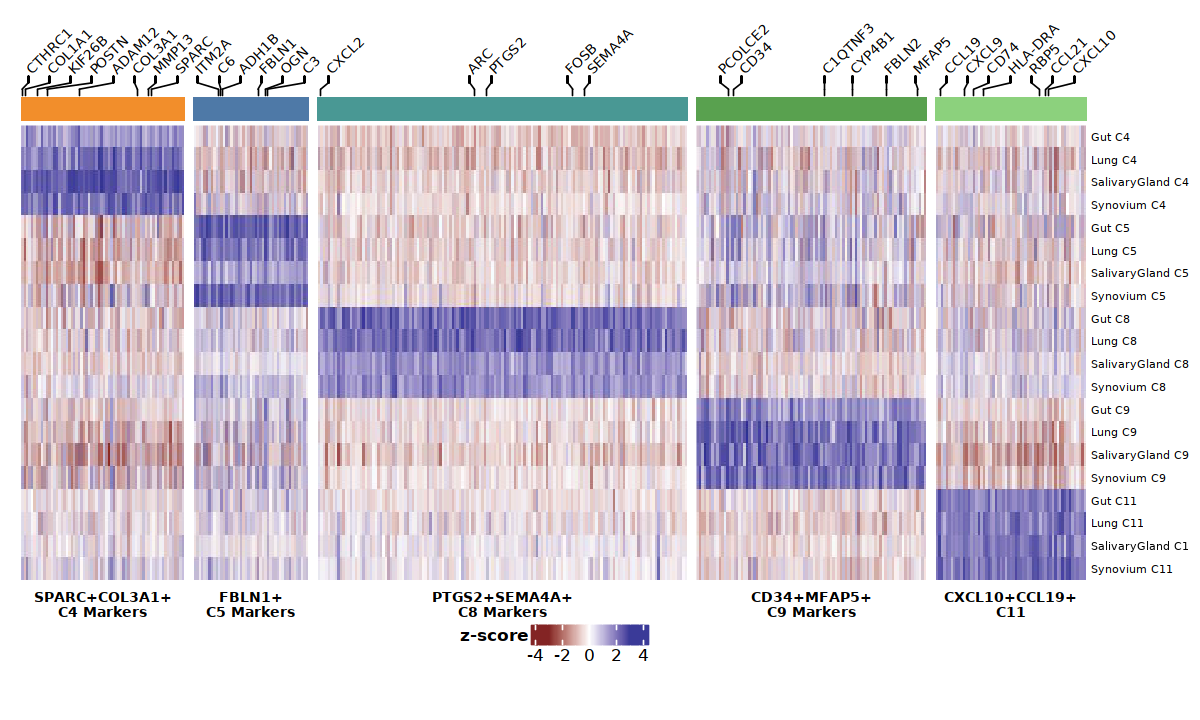

In [30]:
fig.size(6, 10)
ht_opt(RESET = TRUE)
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 6))
ht_opt("heatmap_row_names_gp" = gpar(fontsize = 6))

h1 <- split(seq_len(nrow(markers_all)), markers_all$Cluster) %>% 
    imap(function(idx, .cluster) {
        mat <- plt_mat[, markers_all$feature[idx]]
        ccl <- colnames(mat) %in% markers_top$feature
                
        if (.cluster == '11') {
            Heatmap(
                matrix = mat, 
                
                ## column label
                column_title = gsub(' ', '\n', clust_dict[.cluster, 'Cluster_name']), 
                column_title_side = 'bottom',
                column_title_gp = gpar(fontsize = 8, fontface = "bold"),
                
                name = 'z-score', 
                show_column_names = FALSE,
                colorRamp2(c(-3, 0, 3), c(muted('red'), 'white', muted('blue'))),    
                row_order = order(as.integer(gsub('.*? C(\\d+)', '\\1', rownames(plt_mat)))), 
#                 row_order = order(as.integer(gsub('.*?_(\\d+)', '\\1', rownames(plt_mat)))), 
                column_names_rot = 90, 
                use_raster = TRUE, raster_device = "CairoJPEG",
                cluster_columns = FALSE, 
                cluster_rows = FALSE, 
                show_heatmap_legend = TRUE, 
                heatmap_legend_param = list(
                    legend_direction = "horizontal",
                    title_position = 'lefttop',
                    legend_height = unit(2, "cm")
                ),
#                 show_heatmap_legend = .cluster == '0', ## only show legend for one cluster
                top_annotation = columnAnnotation(
                    show_legend = FALSE, 
                    show_annotation_name = FALSE,
                    link = anno_mark(
                        at = which(ccl), 
                        labels = colnames(mat)[ccl], 
                        labels_gp = gpar(fontsize = 8), padding = unit(1, "mm"),
                        labels_rot = 45
                    ),
                    Cluster = markers_all$Cluster[idx],
                    col = palette_heatmap
#                     labels = c("group1", "group2", "group3"), 
#                     labels_gp = gpar(col = "white", fontsize = 10)
                ),
                
                
#                 right_annotation = rowAnnotation(
#                     df = data.frame(
#                         Cluster = gsub('^(.*)_(\\d+)', '\\2', rownames(mat)),
#                         Tissue = gsub('^(.*)_(\\d+)', '\\1', rownames(mat))
#                     ),
#                     show_legend = FALSE, 
#                     show_annotation_name = FALSE,
#                     col = palette_heatmap
#                 ),
            )
        } else {
            Heatmap(
                matrix = mat, 

                ## Column titles 
                column_title = gsub(' ', '\n', clust_dict[.cluster, 'Cluster_name']) %>% paste0(' Markers'), 
                column_title_side = 'bottom',
                show_column_names = FALSE,
                column_title_gp = gpar(fontsize = 8, fontface = "bold"),
                
                
                colorRamp2(c(-3, 0, 3), c(muted('red'), 'white', muted('blue'))),    
                row_order = order(as.integer(gsub('.*? C(\\d+)', '\\1', rownames(plt_mat)))), 
#                 row_order = order(as.integer(gsub('.*?_(\\d+)', '\\1', rownames(plt_mat)))), 
                column_names_rot = 90, 
                use_raster = TRUE, raster_device = "CairoJPEG",
                cluster_columns = FALSE, 
                cluster_rows = FALSE, 
                show_heatmap_legend = FALSE, ## only show legend for one cluster
                top_annotation = columnAnnotation(
                    show_legend = FALSE, 
                    show_annotation_name = FALSE,
                    link = anno_mark(
                        at = which(ccl), 
                        labels = colnames(mat)[ccl], 
                        labels_gp = gpar(fontsize = 8), padding = unit(1, "mm"),
                        labels_rot = 45
                    ),
                    Cluster = markers_all$Cluster[idx],
                    col = palette_heatmap
                ),
            )
        }
    }) %>% 
    purrr::reduce(`+`)

# draw(h1, heatmap_legend_side = 'bottom')

# p6 <- grid.grabExpr(draw(h1, heatmap_legend_side = 'bottom'))
p6 <- grid.grabExpr(draw(h1, padding = unit(c(10, 2, 2, 2), "mm"), heatmap_legend_side = 'bottom')) #bottom, left, top, right paddings
wrap_elements(p6)

# Panels

In [31]:
library(png)
g0 <- readPNG('../../manuscript/figures/cartoon_pipeline.png') %>% 
    rasterGrob(interpolate = TRUE)
g1 <- readPNG('../../manuscript/figures/cartoon_hierarchical_model.png') %>% 
    rasterGrob(interpolate = TRUE)


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


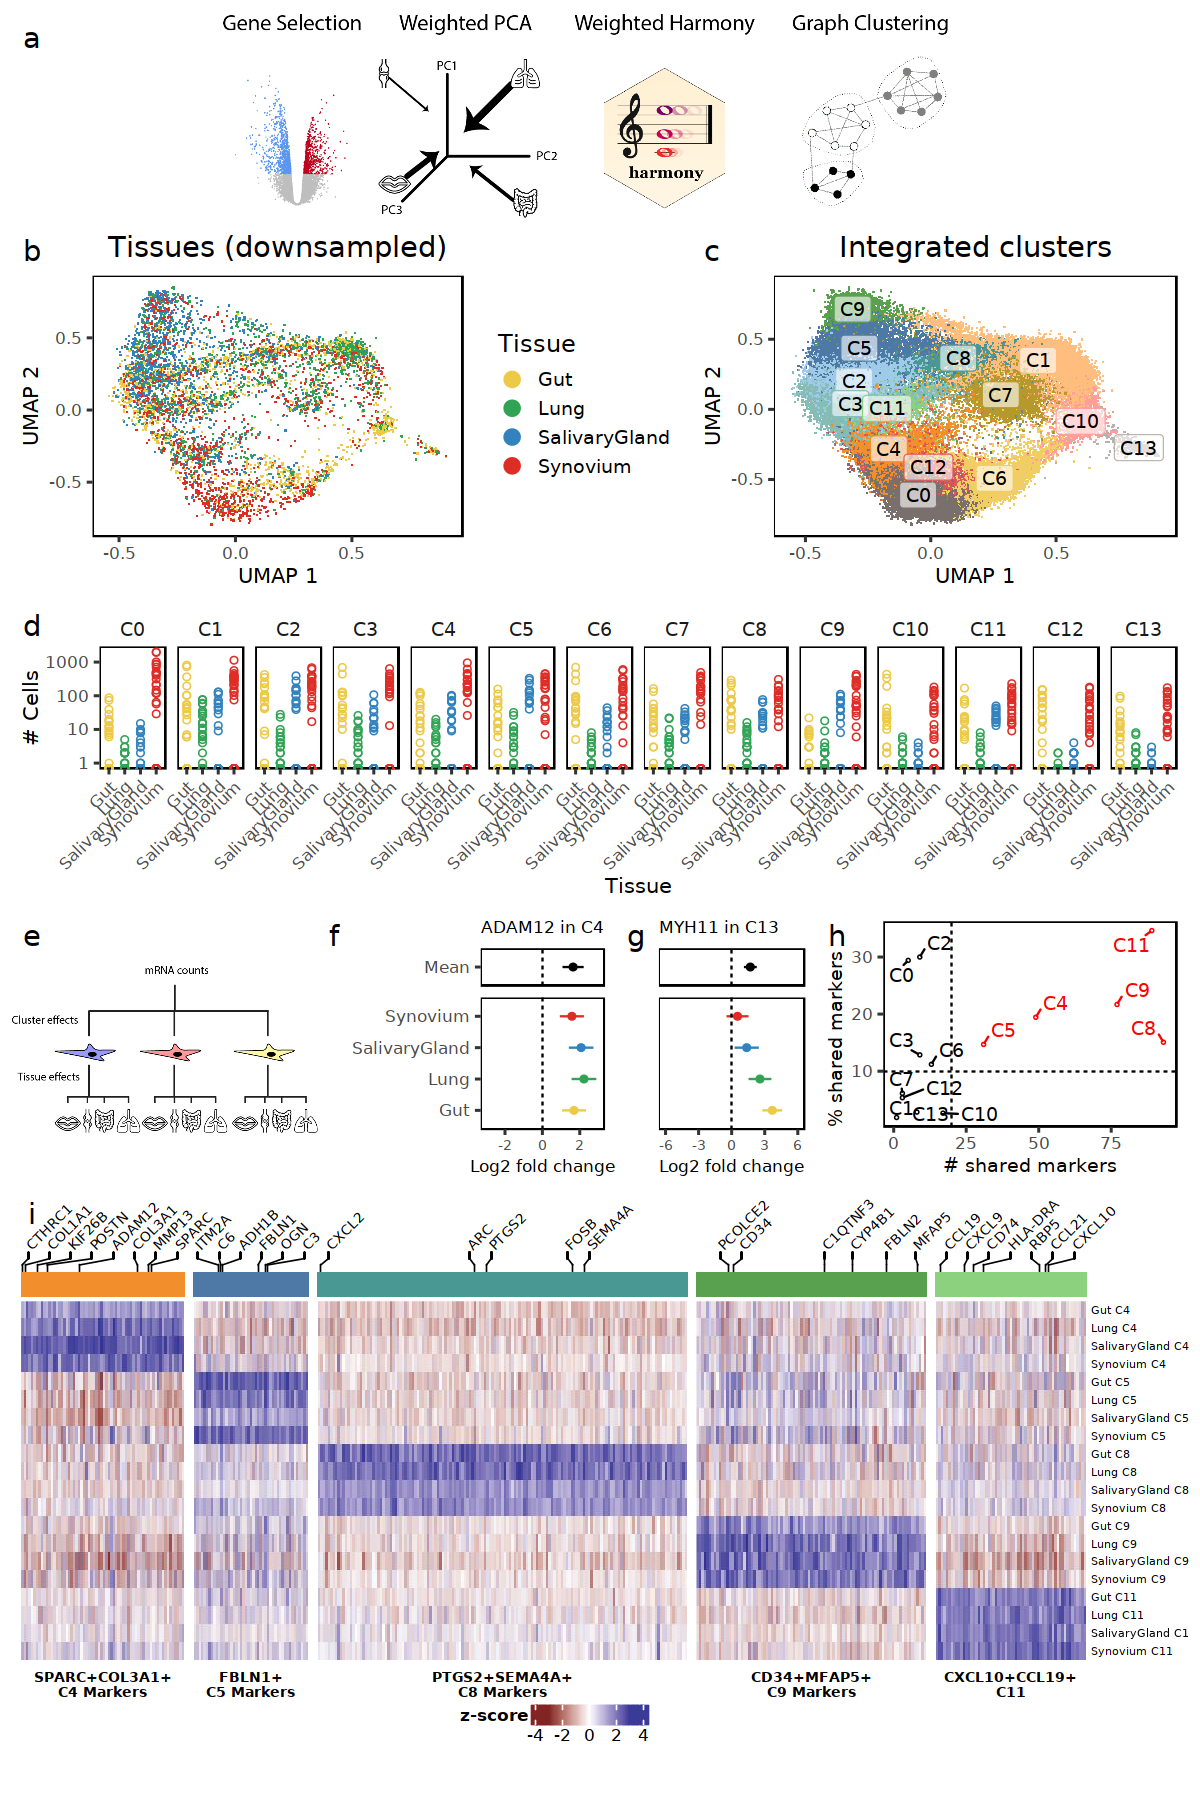

In [32]:
fig.size(15, 10)
(
    (
#         wrap_elements(grid::textGrob('Pipeline figure')) 
#         wrap_elements(p_pipeline) 
        wrap_elements(full = g0)
    ) / 
    (
        (wrap_elements(full=p1) | wrap_elements(full = p3)) +
            plot_layout(widths = c(1.4, 1))
    ) / 
    (
        wrap_elements(full = p3_2) 
    ) / 
    (
        (
            wrap_elements(full = g1) | 
            wrap_elements(full = forest_adam12) | 
            wrap_elements(full = forest_myh11) | 
            wrap_elements(full = p5)        
        ) + plot_layout(widths = c(1, 1, .6, 1.25))
#         wrap_elements(grid::textGrob('Hierchical Model figure')) | forest_adam12 | forest_myh11 | p5
    #         wrap_elements(p_pipeline) 
    ) / (
        wrap_elements(full = p6)
    )
) + 
    plot_layout(heights = c(.5, 1, .8, .7, 1.7)) + 
    plot_annotation(tag_levels = 'a')



In [33]:
ggsave(
    filename = '../../manuscript/figures/Figure2.pdf', 
    units = 'in', device = 'pdf', 
    height = 15, width = 10,
    useDingbats = FALSE
)


Warning message:
“Transformation introduced infinite values in continuous y-axis”
